In [1]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(igraph))
suppressPackageStartupMessages(library(plotrix))
suppressPackageStartupMessages(library(ggsci))

Warning message:
“package ‘plotrix’ was built under R version 4.0.5”
Warning message:
“package ‘ggsci’ was built under R version 4.0.5”


In [2]:
## path variables
results_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_exvivo/01_data/NicheNet_outputs/ligand_activities_FC+Nintedanib_FC_cell_circuits/'
fig_dir <- '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_exvivo/02_figures/ASK_joint/NicheNet/'

In [3]:
## read data
mat <- read.csv(paste0(results_dir,'221204_qual_crosstalk_FC+Nintedanib_FC_cell_circuit.csv'), row.names = 1, check.names = F, header = T)
mat <- as.matrix(mat)

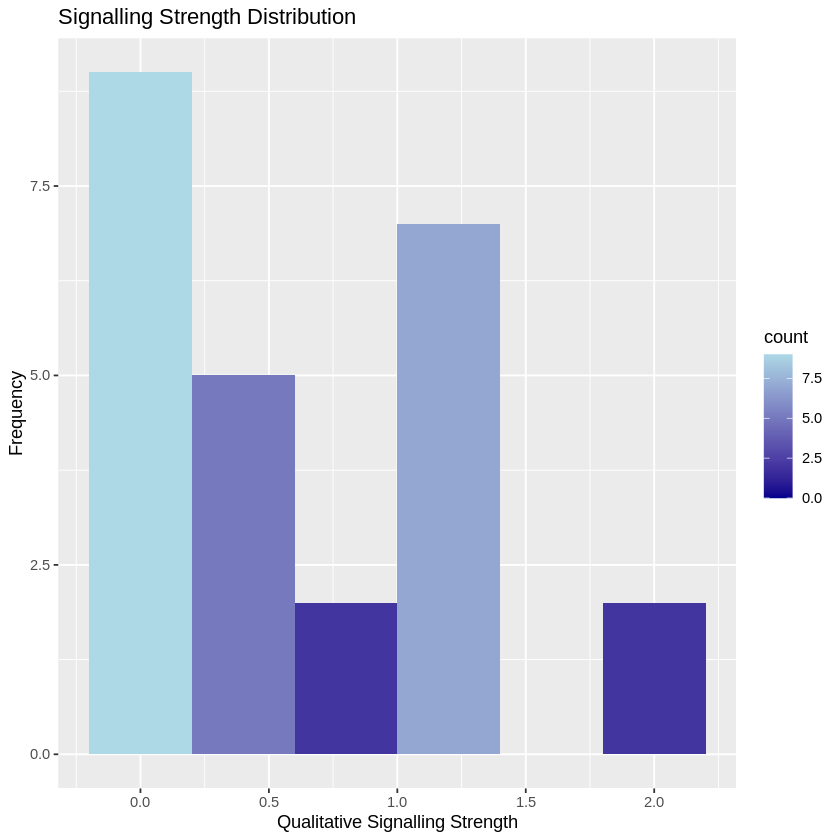

In [4]:
## visualize distribution of scores
qplot(x = mat , fill=..count.., geom='histogram', binwidth = .4,
                 xlab = 'Qualitative Signalling Strength',
                 ylab = 'Frequency',
                 main = 'Signalling Strength Distribution')+ scale_fill_gradient(low='darkblue', high='lightblue')

In [5]:
## do not consider autocrine feedback
diag(mat) = 0

In [6]:
### highlight differences for visualization
#mat[mat < 0.5] = 0
#mat = mat * 1

In [7]:
#reorder cols and rows to make plot visually more appealing
mat <- mat[c('Aberrant Basaloid','ectopic EC','Myofibroblasts', 'Pericytes','Profibrotic Macrophages'),
           c('Aberrant Basaloid','ectopic EC','Myofibroblasts', 'Pericytes','Profibrotic Macrophages')]

In [8]:
## parameters for plotting 
options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res = 100)

In [9]:
## create igraph object
nn_ig <- graph_from_adjacency_matrix(mat,  mode = c('directed'), weighted = TRUE)

In [10]:
### size factor for vertex size
sf <- 4

In [11]:
## multiply weights with weight factor - for visualization purposes only
wf <- 2
#E(nn_ig)$weight <- E(nn_ig)$weight*wf

In [12]:
nn_ig

IGRAPH 3dd6f27 DNW- 5 19 -- 
+ attr: name (v/c), weight (e/n)
+ edges from 3dd6f27 (vertex names):
 [1] Aberrant Basaloid->Myofibroblasts         
 [2] Aberrant Basaloid->Pericytes              
 [3] Aberrant Basaloid->Profibrotic Macrophages
 [4] ectopic EC       ->Aberrant Basaloid      
 [5] ectopic EC       ->Myofibroblasts         
 [6] ectopic EC       ->Pericytes              
 [7] ectopic EC       ->Profibrotic Macrophages
 [8] Myofibroblasts   ->Aberrant Basaloid      
+ ... omitted several edges

In [13]:
## have a look at node names
V(nn_ig)$name

[1] "Aberrant Basaloid"       "ectopic EC"             
[3] "Myofibroblasts"          "Pericytes"              
[5] "Profibrotic Macrophages"

In [14]:
## add colors to edges
E(nn_ig)$color <- color.scale(E(nn_ig)$weight, extremes = c(pal_material('pink')(10)[1], pal_material('pink')(10)[10]))

In [15]:
## add colors to edges
E(nn_ig)$color <- color.scale(E(nn_ig)$weight, extremes = c('#EAEAEA', '#D03833')) ##45CAFF

In [16]:
## define circular layout
circle_coordinates <- layout_in_circle(nn_ig)

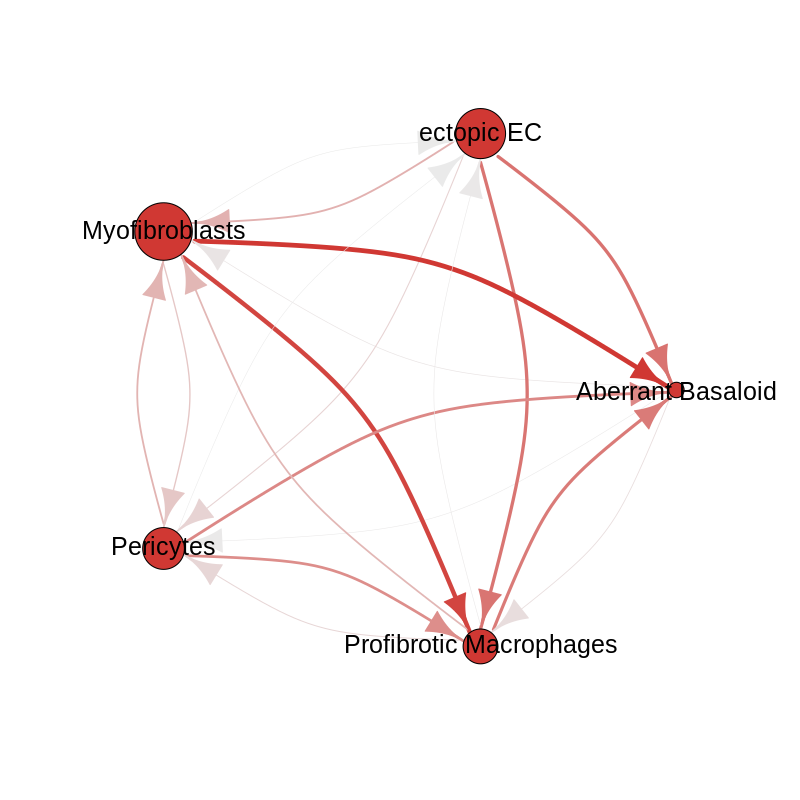

In [17]:
## plot graph
plot(nn_ig, 
     layout = circle_coordinates,
     edge.width = 0.5+E(nn_ig)$weight*wf,
     vertex.size = 5+sf*rowSums(mat), vertex.color = '#D03833', 
     vertex.label.family = 'Helvetica', vertex.label.color= 'black', vertex.label.cex = 1.5,
     edge.curved = .3, edge.arrow.size = 1.5)

In [18]:
radian.rescale <- function(x, start=0, direction=1) {
    c.rotate <- function(x) (x + start) %% (2 * pi) * direction
    c.rotate(scales::rescale(x, c(0, 2 * pi), range(x)))
  }

In [19]:
label.locs <- radian.rescale(x=1:length(V(nn_ig)), direction=-1, start=0)

In [20]:
# save to pdf
pdf(paste0(fig_dir, 'crosstalk_exvivo_FC+Nintedanib_cell_circuit_overview.pdf'),         # File name
    width = 8, 
    height = 8, # Width and height in inches
    #colormodel = 'cymk',    # Color model (cmyk is required for most publications)
    paper = 'a4r')          # Paper size
# creating plot

plot(nn_ig, 
     layout = circle_coordinates,
     edge.width = E(nn_ig)$weight*wf,
     vertex.size = 3+sf*rowSums(mat), vertex.color = '#D03833', 
     vertex.label.family = 'Helvetica', vertex.label.color= 'black', vertex.label.cex = 0.5, 
     vertex.label.dist= 3, vertex.label.degree=label.locs,
     edge.curved = .3, edge.arrow.size = 2)

# closing the graphical device
dev.off() 

png 
  2